<a href="https://colab.research.google.com/github/haiderzm/NeuralNetwithPyTorch/blob/master/Handwritten_DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch
!pip install torchvision

    100% |████████████████████████████████| 591.8MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61af6000 @  0x7f3b1268a2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 3.0MB/s 
    100% |████████████████████████████████| 2.0MB 10.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt

In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=datasets.MNIST(root="data",download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64)

tensor(9)


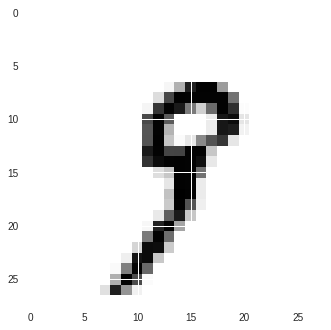

In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
i=19
plt.imshow(images[i].numpy().squeeze())
print(labels[i])

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        
        self.hidden = nn.Linear(784, 256)
        
        self.output = nn.Linear(256, 10)
        
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
       
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [0]:
model=Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)


In [0]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [0]:
images=images.view(images.shape[0],784)

In [0]:
images, labels = next(iter(trainloader))
for i in range(1000):
  images = images.view(images.shape[0], 784)
    
        
  optimizer.zero_grad()
        
  output = model.forward(images)
  loss = criterion(output, labels)
  loss.backward()
  optimizer.step()
  print(loss.item())

1.6372597217559814
1.634871006011963
1.633457899093628
1.6300259828567505
1.6249463558197021
1.6206146478652954
1.6174415349960327
1.6145051717758179
1.6110354661941528
1.6067774295806885
1.6016355752944946
1.5954927206039429
1.58918297290802
1.585060715675354
1.5829062461853027
1.578371286392212
1.5723859071731567
1.568485975265503
1.5663707256317139
1.5641381740570068
1.5610628128051758
1.5579612255096436
1.5557500123977661
1.5542739629745483
1.5527430772781372
1.5508980751037598
1.5491244792938232
1.5477468967437744
1.5467404127120972
1.5459216833114624
1.5451433658599854
1.5443559885025024
1.5435774326324463
1.5428364276885986
1.5421380996704102
1.5414559841156006
1.540742039680481
1.5399214029312134
1.5388774871826172
1.5374209880828857
1.535256266593933
1.5319721698760986
1.5272213220596313
1.5213600397109985
1.5166748762130737
1.5164579153060913
1.5148266553878784
1.5075056552886963
1.5029468536376953
1.5014621019363403
1.4995208978652954
1.4956961870193481
1.491553544998169
1.4

tensor([[9.9993e-01, 8.3375e-07, 1.5613e-05, 1.1464e-06, 2.3887e-06, 1.8654e-05,
         9.3859e-06, 1.3907e-05, 4.0114e-06, 1.5203e-07]])


(0, 9)

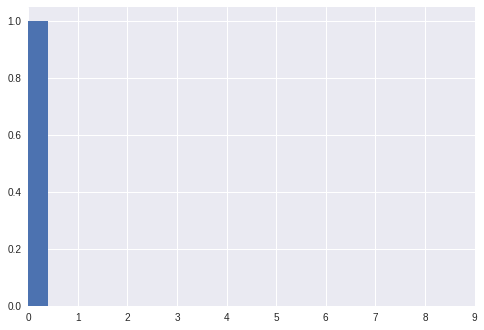

In [155]:

img = images[1].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps=logps
print(logps)
x=torch.tensor([0,1,2,3,4,5,6,7,8,9])
plt.bar(x.numpy(),ps.numpy().squeeze())
plt.xlim(0,9)